# Appendix: More Seaborn Plotting

*Adapted from [this post](https://www.dannidanliu.com/introduction-to-s/)*  

The intent of this notebook is to showcase the common Seaborn plots that are useful for exploratory data analysis.

In [3]:
# import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
# All datasets in seaborn
dataset_names = sns.get_dataset_names()
print("Datasets:", dataset_names)

Datasets: ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Plots
 Here are, in no particular order, the common plot types useful for exploratory data analysis we will examine:
 - Scatter plot
 - Histogram
 - Count plot
 - Boxplot
 - Line chart
 - Pairplot
 - Jointplot

## Scatter Plot
A scatter plot shows how two things are related. You put one thing on the x-axis, another on the y-axis, and each dot on the plot represents one set of these two things. It helps you see if the two things have any connection. If the dots go up as you move to the right, it's a positive connection. If they go down, it's negative. If there's no clear pattern, it means there's probably no connection

In [4]:
# load penguin data
penguins_data = pl.DataFrame(sns.load_dataset('penguins') )

# sample of the data
penguins_data.head()


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,f64,f64,f64,f64,str
"""Adelie""","""Torgersen""",39.1,18.7,181.0,3750.0,"""Male"""
"""Adelie""","""Torgersen""",39.5,17.4,186.0,3800.0,"""Female"""
"""Adelie""","""Torgersen""",40.3,18.0,195.0,3250.0,"""Female"""
"""Adelie""","""Torgersen""",null,null,null,null,null
"""Adelie""","""Torgersen""",36.7,19.3,193.0,3450.0,"""Female"""


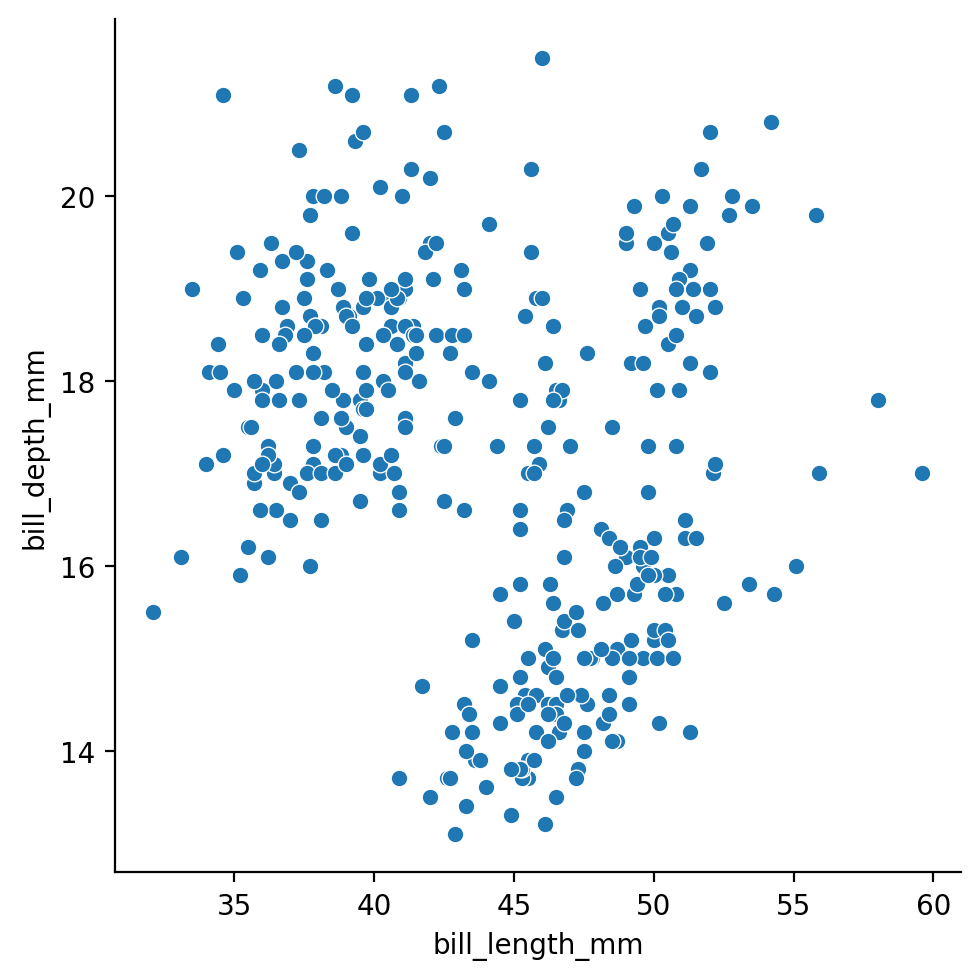

In [5]:
# plot scatter plot
sns.relplot(data = penguins_data,
            x= 'bill_length_mm',
            y= 'bill_depth_mm',
            kind= 'scatter')

## Histogram
A histogram is like a bar chart but for numbers. It shows how often different values appear in a dataset. You put numbers in groups, called 'bins,' on the x-axis, and how many times those numbers occur on the y-axis. It helps you understand the distribution of your data. If the bars are higher on one side, it means more numbers fall into that range. It's great for seeing patterns and outliers in your data.

In [6]:
# load tips data
tips_data = pl.DataFrame(sns.load_dataset('tips'))

# sample of the data
tips_data.head()


total_bill,tip,sex,smoker,day,time,size
f64,f64,cat,cat,cat,cat,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


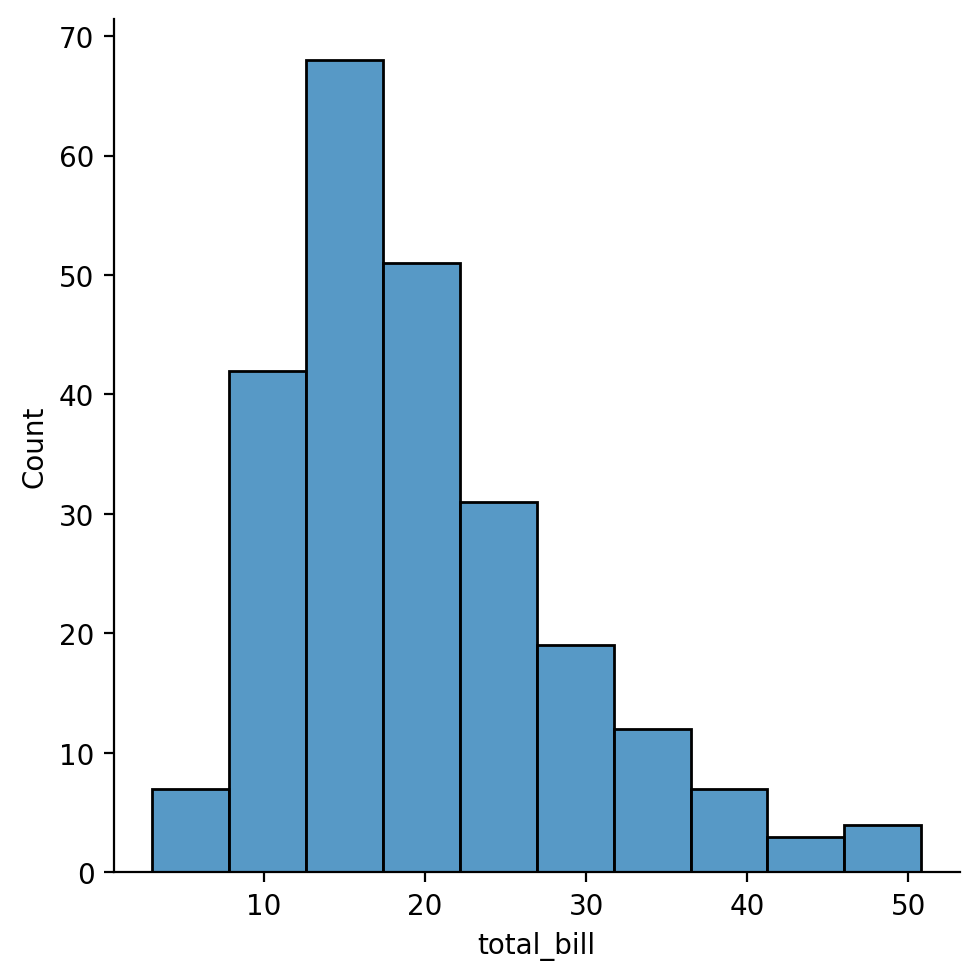

In [7]:
# plot histogram plot
sns.displot(data= tips_data,
            x= 'total_bill',
            bins = 10,
            kind= 'hist')

## Count Plot
Count plot is a simple way to show how many times each category appears in a dataset. It's like a bar chart, where the categories are listed on the x-axis, and the count (frequency) of each category is shown on the y-axis. It's useful for quickly understanding the distribution of categorical variables in your data. The taller the bar, the more times that category appears in your dataset. It's handy for spotting common categories or imbalances in your data.

<Axes: xlabel='island', ylabel='count'>

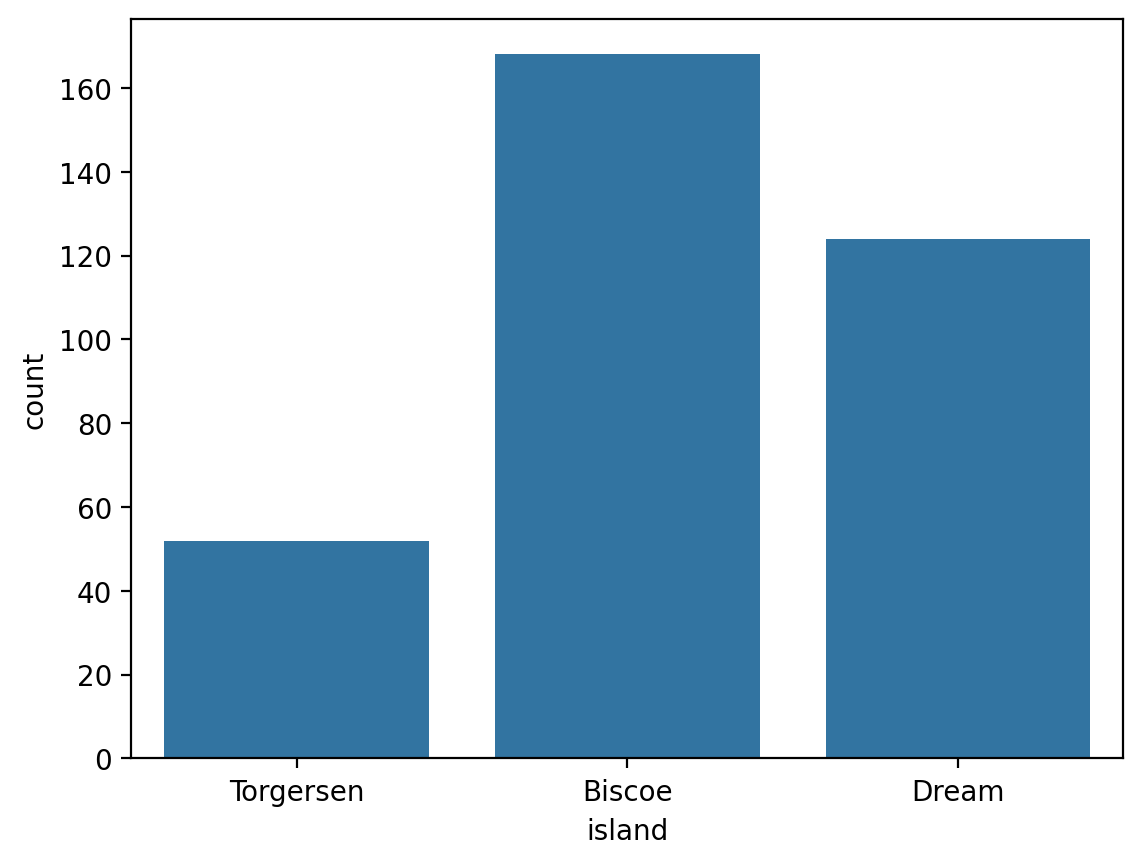

In [8]:
# Using the island column of the penguins data loaded earlier.
sns.countplot(data= penguins_data, x= 'island')

## Box Plot
A box plot is a compact way to display the distribution of numerical data and identify outliers. It shows the median (middle value), quartiles (dividing the data into four equal parts), and any outliers in the data. The 'box' represents the middle 50% of the data, with the line inside it representing the median. The 'whiskers' extend to the smallest and largest non-outlier values. Points outside the whiskers are considered outliers. It's helpful for comparing distributions and identifying unusual data points.

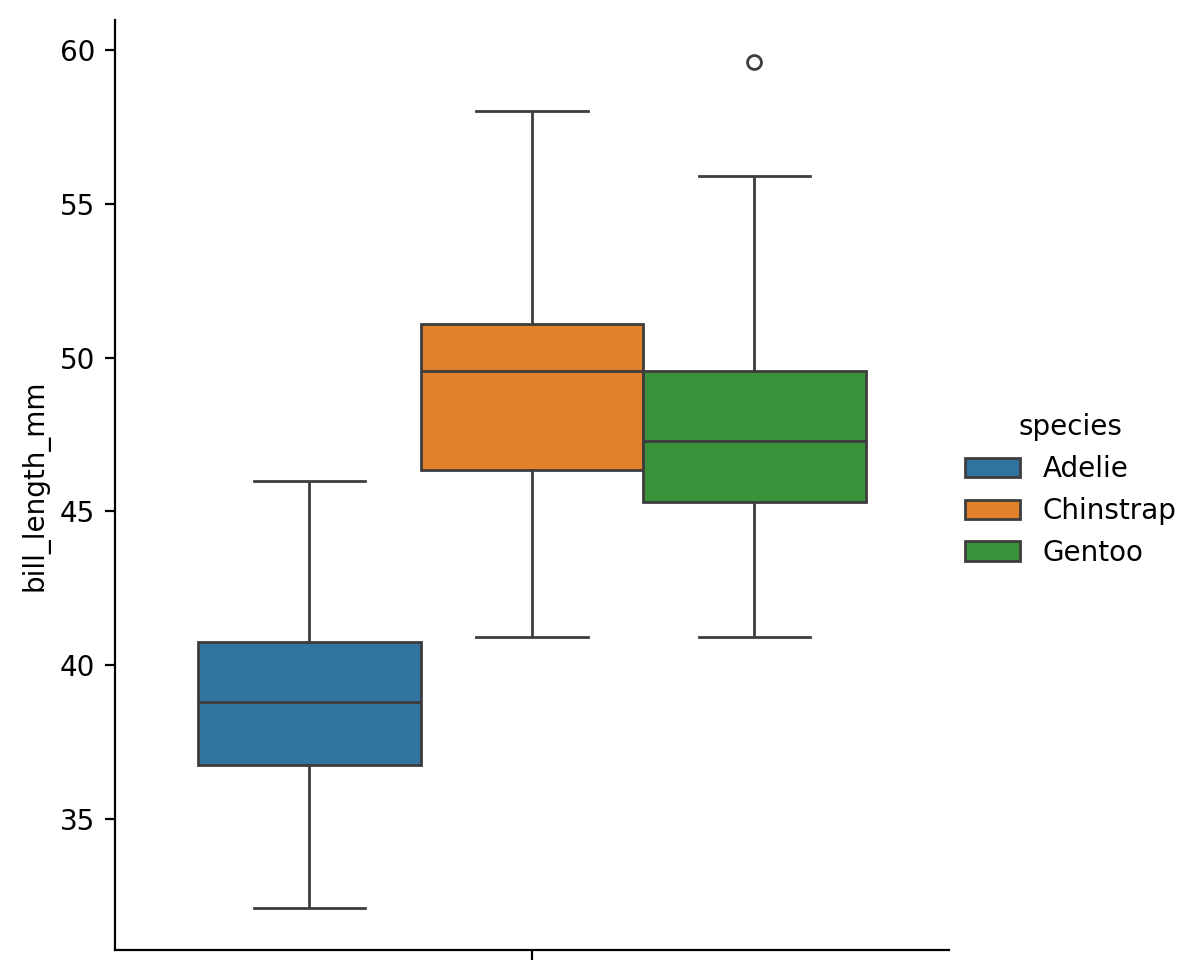

In [9]:
# Using the island column of the penguins data loaded earlier.
sns.catplot(data= penguins_data,
            y= 'bill_length_mm',
            kind= 'box',
            hue = 'species')

## Line Chart
A line chart is a type of graph that shows how data changes over time or another continuous interval. It's useful for visualizing trends, comparing data sets, or identifying patterns over time. The x-axis typically represents the time or interval, while the y-axis represents the value being measured.

In [10]:
# load stock data
dowjones_data = pl.DataFrame(sns.load_dataset('dowjones'))

# sample of the data
dowjones_data.head()


Date,Price
datetime[ns],f64
1914-12-01 00:00:00,55.0
1915-01-01 00:00:00,56.55
1915-02-01 00:00:00,56.0
1915-03-01 00:00:00,58.3
1915-04-01 00:00:00,66.45


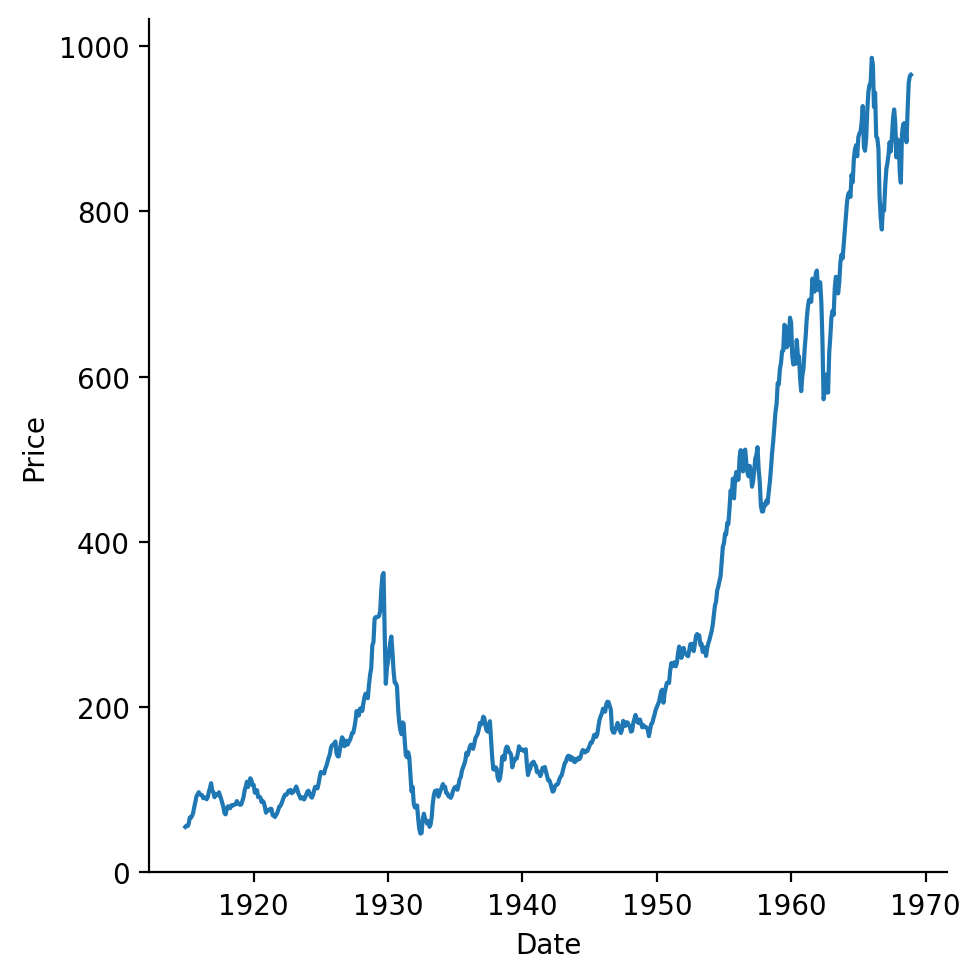

In [11]:
# plot line chart
sns.relplot(data= dowjones_data,
            x= 'Date',
            y= 'Price',
            kind= 'line')

## Pair Plot
A pair plot, also known as a scatterplot matrix, is a grid of scatterplots showing the relationships between pairs of variables in a dataset. Each scatterplot in the grid represents the relationship between two numerical variables. It helps visualize the relationships and correlations between multiple variables simultaneously.
The diagonal of the pair plot typically shows a histogram or kernel density plot for each variable, allowing you to see the distribution of each variable individually.
Pair plots are useful for exploring multivariate relationships and identifying patterns or trends in the data.

A kernel density plot is a smoothed version of a histogram.

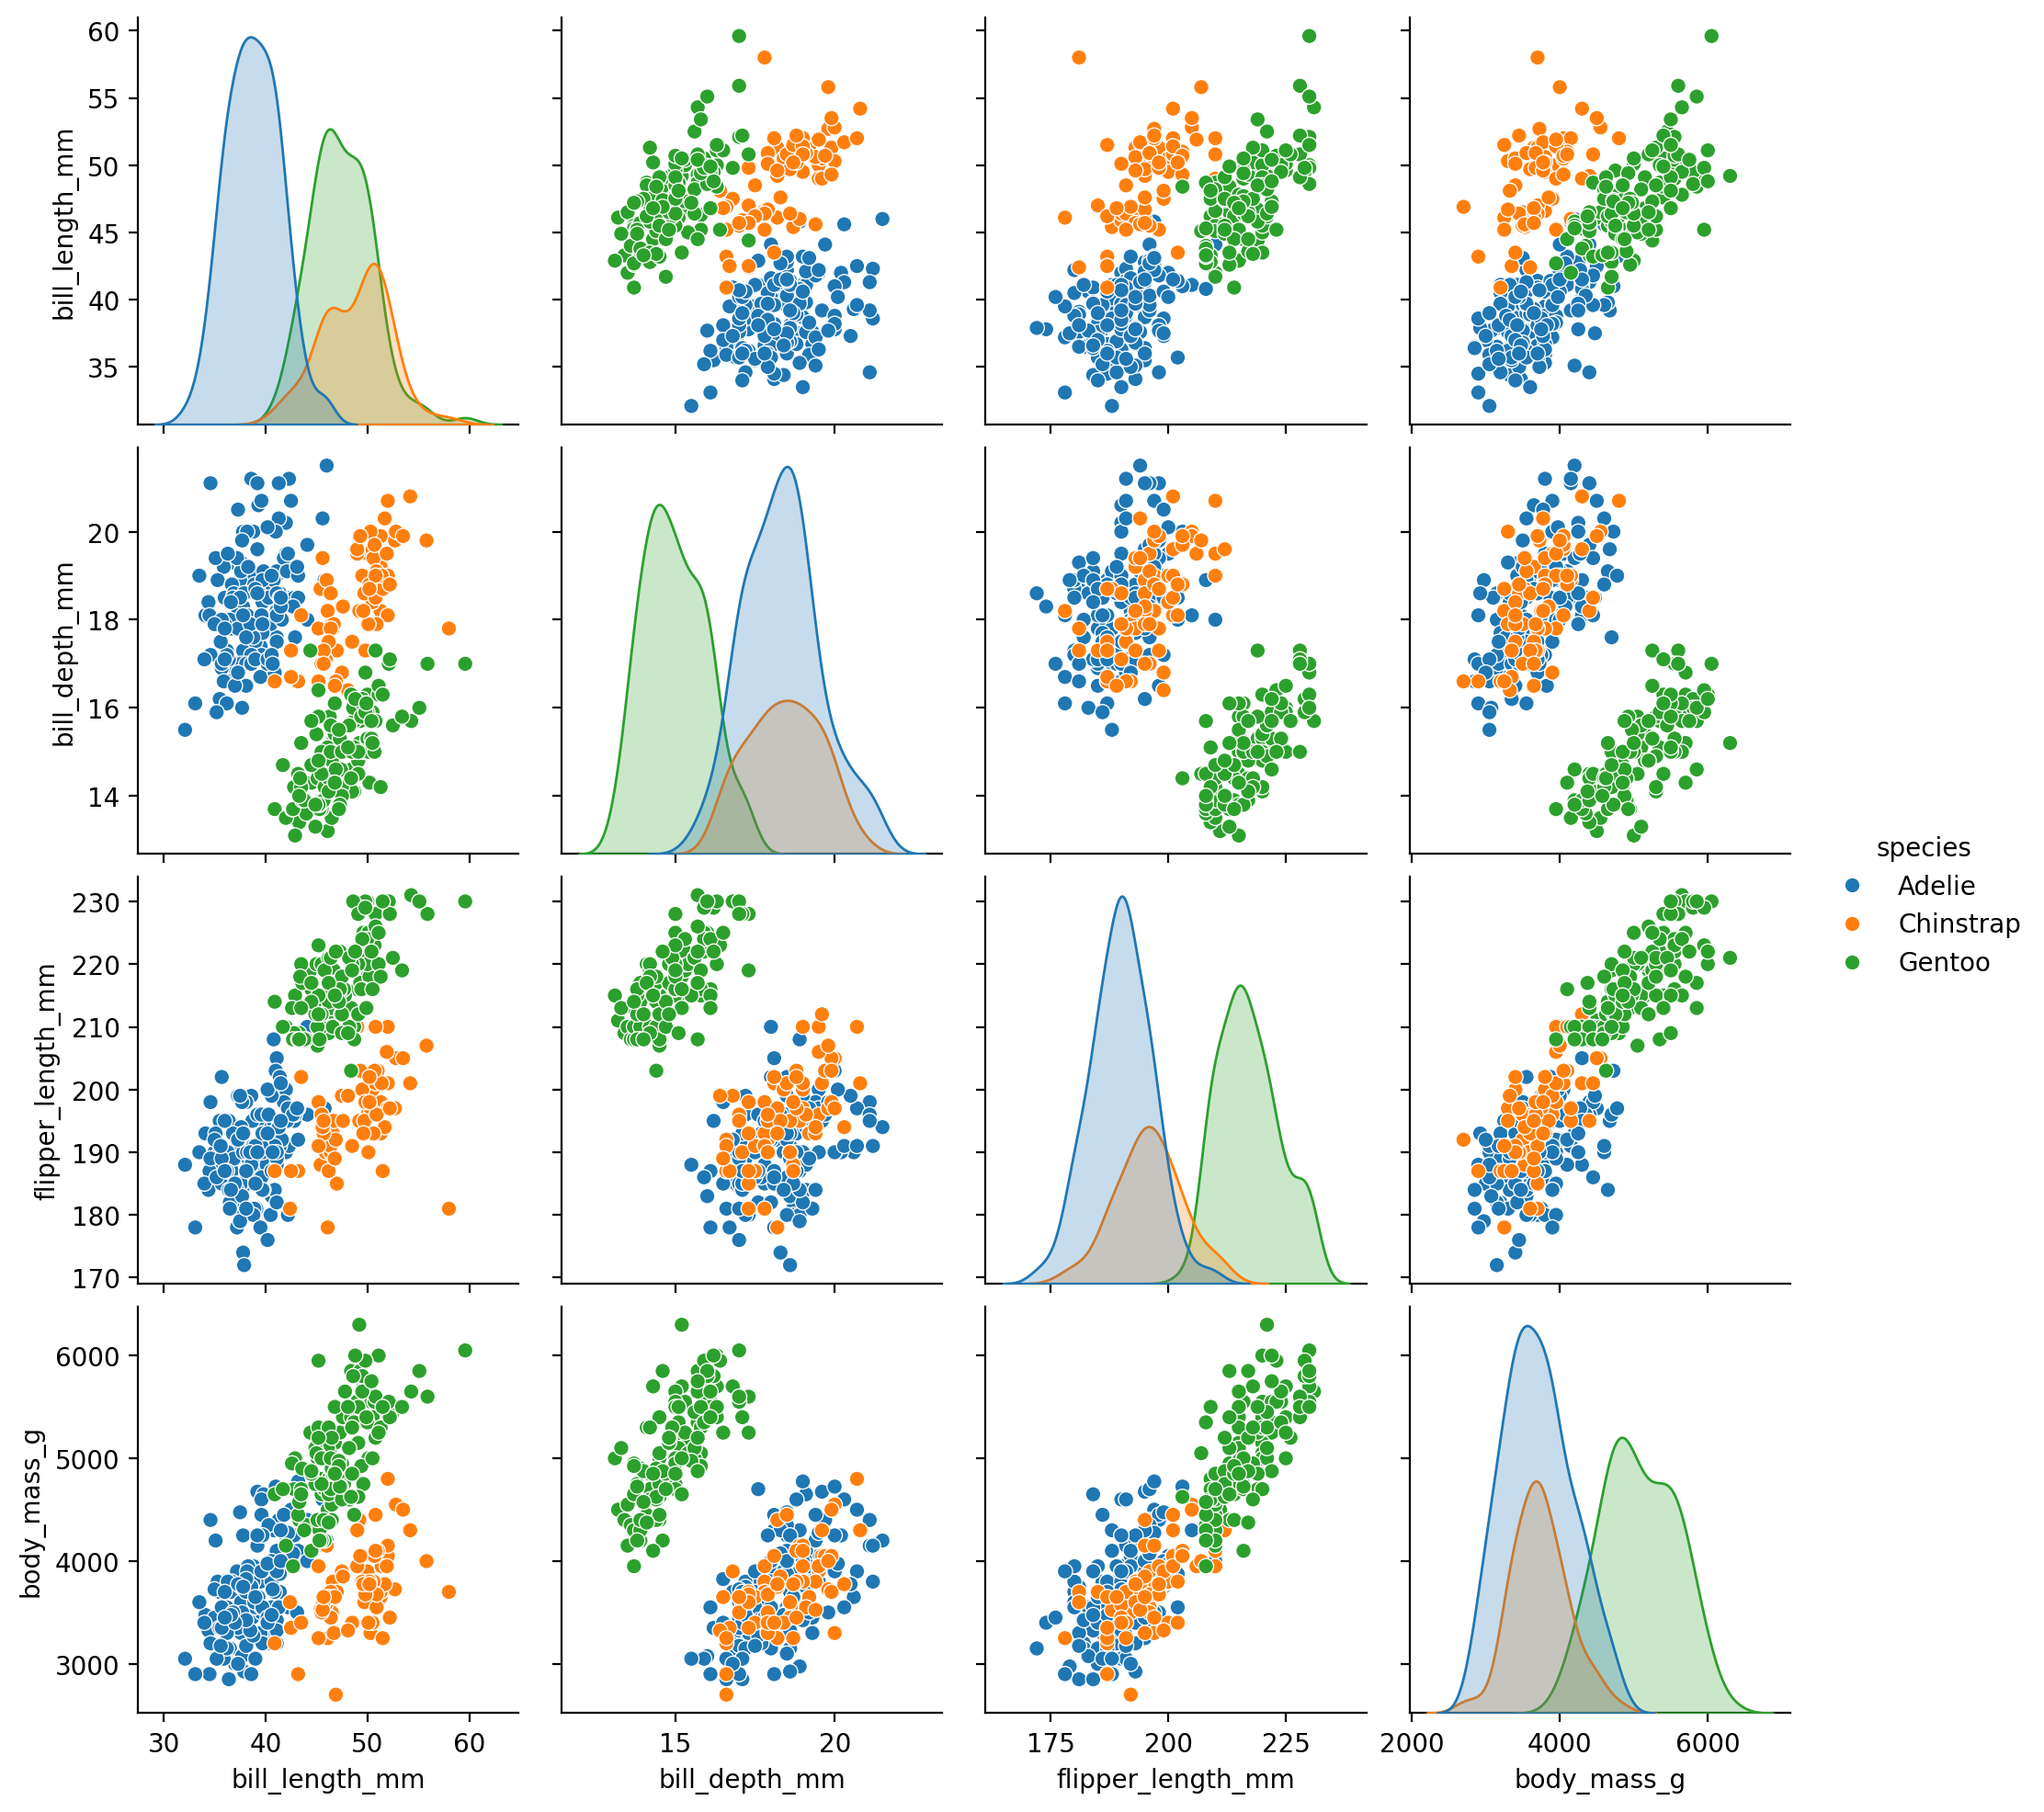

In [15]:
# Using the penguins data loaded earlier.
sns.pairplot(data=penguins_data.to_pandas(), hue="species")

## Jointplot
A Seaborn jointplot combines a scatterplot and two histograms. It shows the relationship between two numerical variables by plotting their joint distribution. The central part of the jointplot displays a scatterplot of the two variables, while the marginal histograms show the distribution of each variable individually. It's useful for visualizing correlations between variables and understanding their distributions simultaneously.


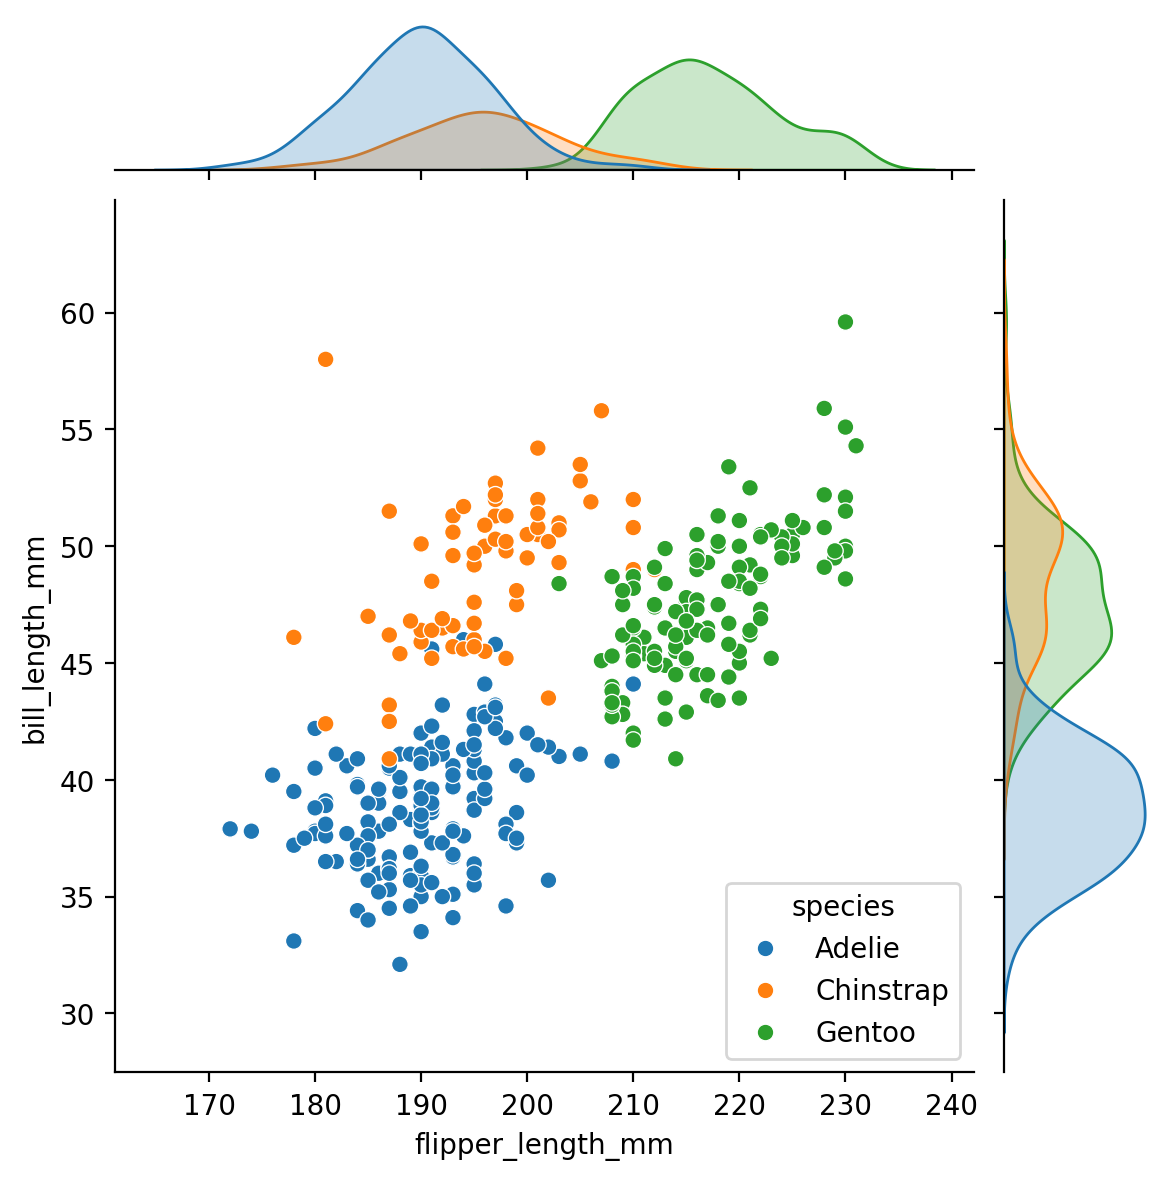

In [17]:
# Using the penguins data loaded earlier.
sns.jointplot(data=penguins_data,
              x="flipper_length_mm",
              y= "bill_length_mm",
              hue="species")

# Basic Customization
Here is a list of items we will look at:

## Plot style and colour
- changing style
- changing palette
- create and use custom palette

## Adding tittles and labels
- FacetGrids (Figure-level functions) vs AxesSubplots (Axes-level functions)
- adding a title to a facetgrid object
- adding a title and axis labels
- rotating x-tick labels

## Plot Style
Seaborn has 5 preset figure styles which change the background and axes of the plot. They are:
- "white" : provides clean axes with a solid white background
- "whitegrid": whitegrid add a gray grid in the background
- "dark": provides a gray background
- "darkgrid": provides a gray background with a white grid and
- "ticks": similar to white but adds small tick marks to the x- and y-axes.

The default figure style is "white".

To set one of these as the global style for all plots, use the "set style function"


<Axes: xlabel='island', ylabel='count'>

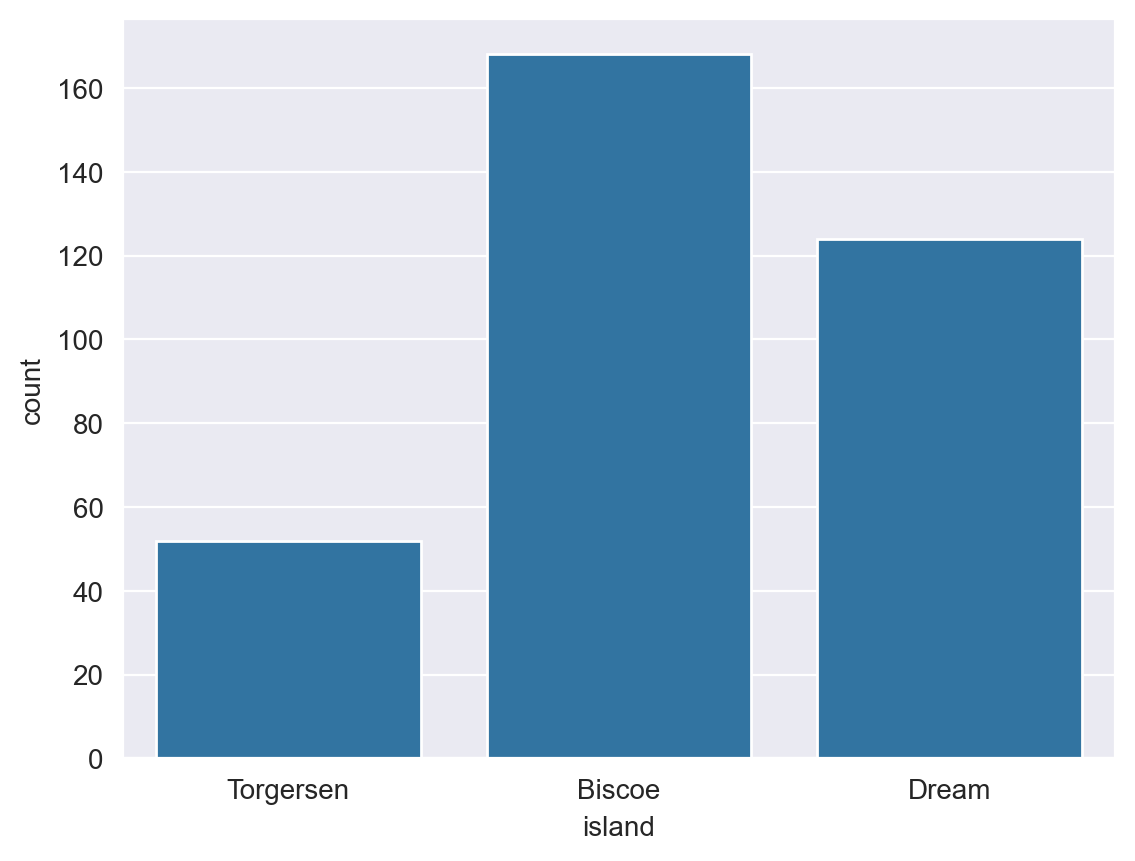

In [19]:
sns.set_style("darkgrid")
sns.countplot(data= penguins_data, x= 'island')

## Color
Seaborn comes with many preset colour palettes that can be referred to by name.
Palette comes in the following types:

- **Qualitative Palettes**: These are suitable for categorical data where no particular ordering is implied. Examples include "deep," "bright," "pastel," and "dark."
- **Sequential Palettes**: These are suitable for ordered data where you want to show variation from low to high values. Examples include "viridis," "inferno," "cividis," and "magma."
-**Diverging Palettes**: These are suitable for ordered data where you want to highlight both low and high values relative to a midpoint. Examples include "coolwarm," "RdBu," "PuOr," and "Spectral.
- **Categorical Palettes**: These are suitable for categorical data where you want distinct colors for each category but don't require an inherent order. Examples include "husl," "hls," "Paired," and "Set3."

You can also create own custom palette.

### Qualitative Palettes

deep
muted
pastel
bright
dark
colorblind


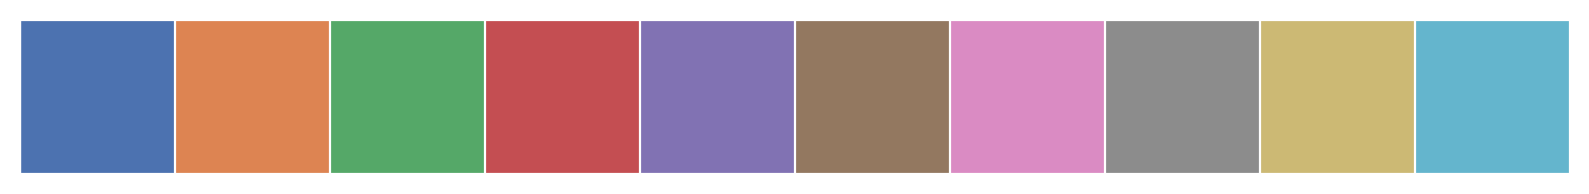

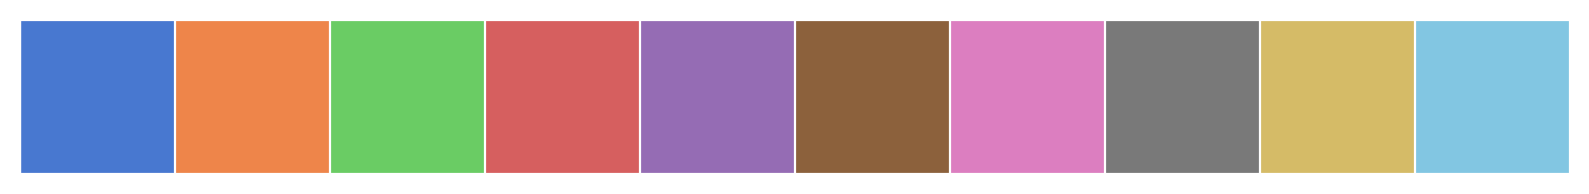

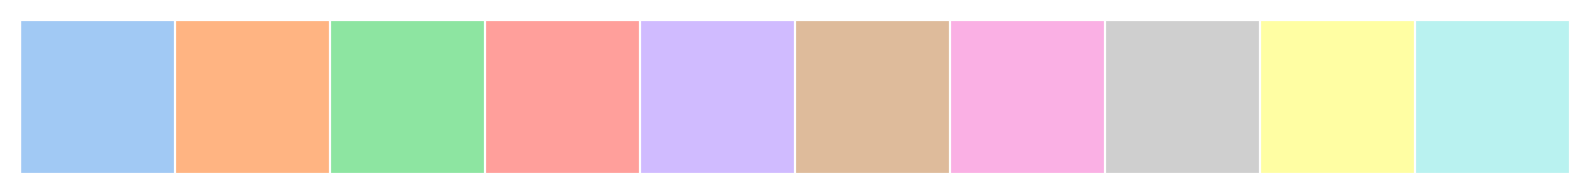

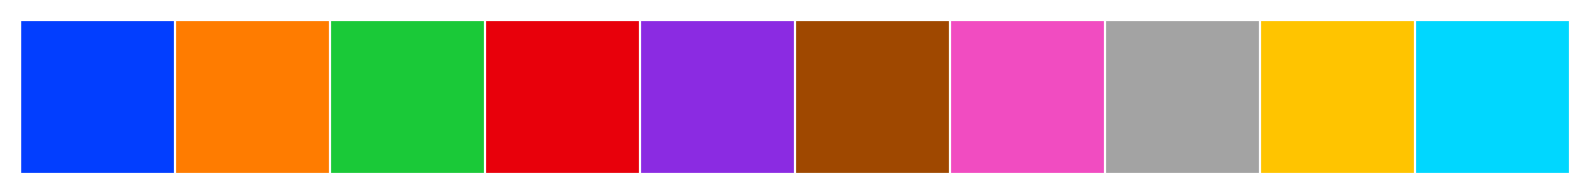

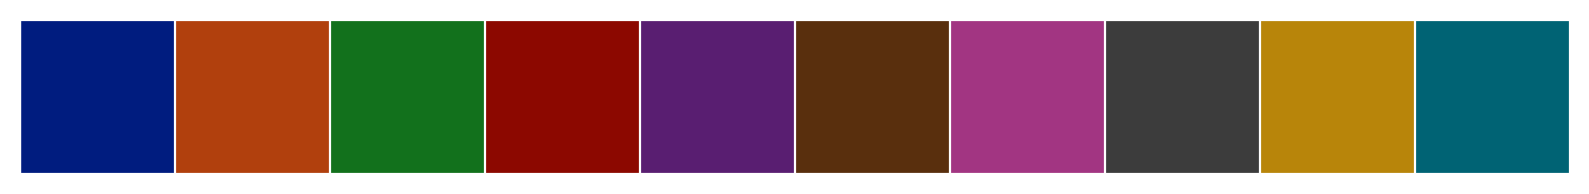

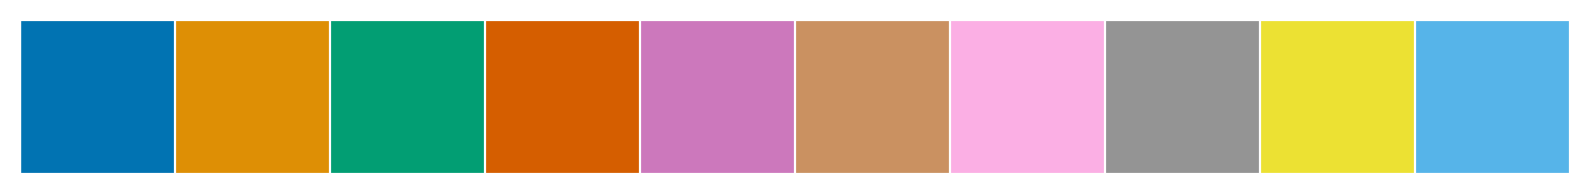

In [20]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for p in palettes:
  print(p)
  sns.set_palette(p)
  sns.palplot(sns.color_palette())

### Sequential Palettes

viridis
inferno
cividis
magma


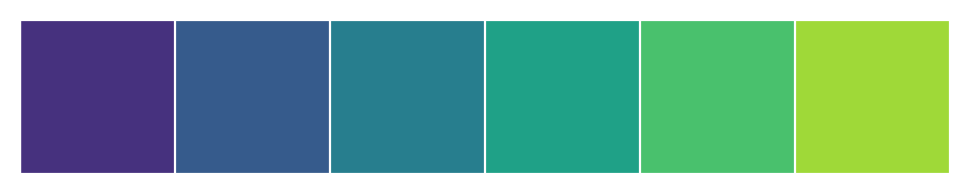

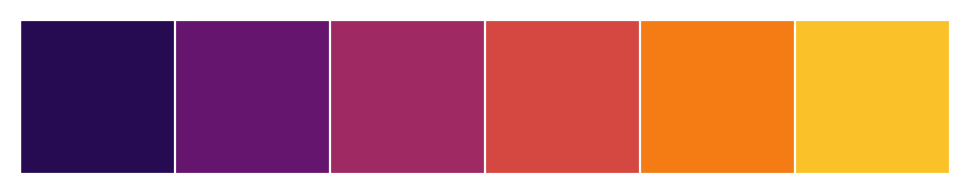

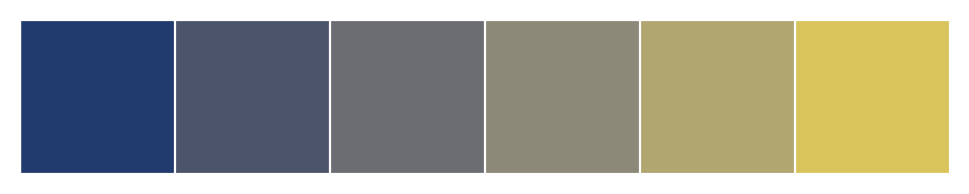

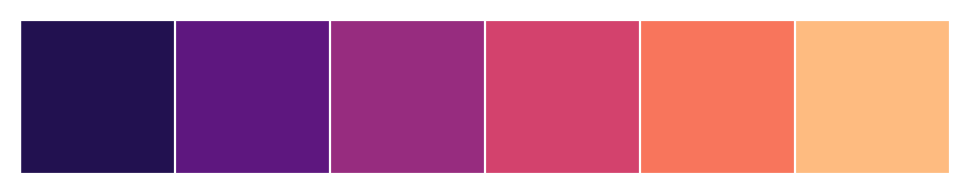

In [21]:
palettes = ['viridis', 'inferno', 'cividis','magma']

for p in palettes:
  print(p)
  sns.set_palette(p)
  sns.palplot(sns.color_palette())

### Diverging Palettes

RdBu
PRGn
RdBu_r
PRGn_r


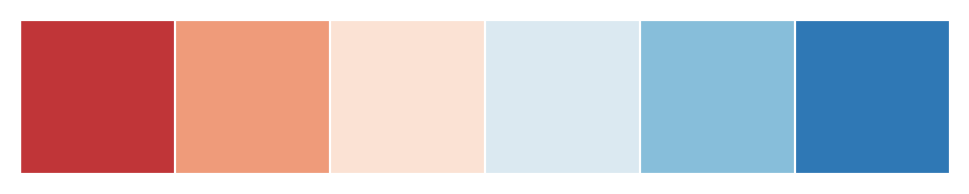

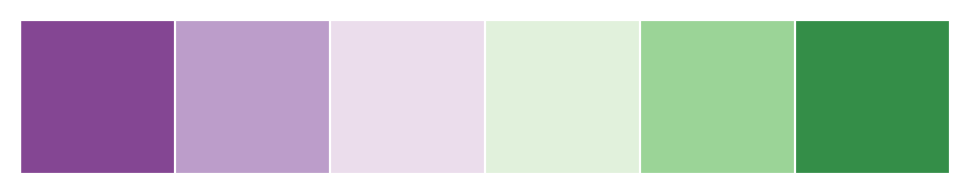

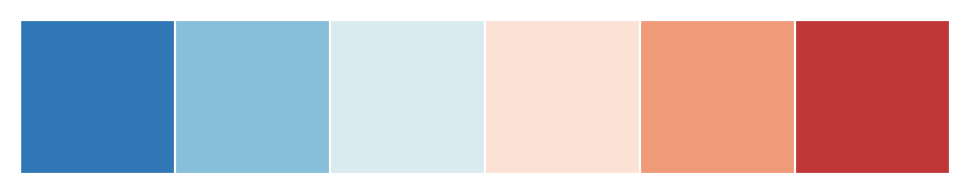

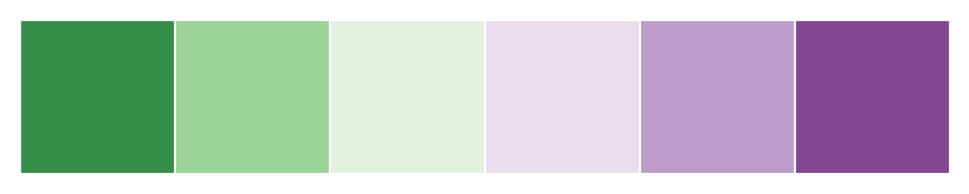

In [22]:
palettes = ['RdBu', 'PRGn', 'RdBu_r', 'PRGn_r']
# note the "_r" append to the palette name reverse the palette.

for p in palettes:
  print(p)
  sns.set_palette(p)
  sns.palplot(sns.color_palette())

### Categorical Palettes

husl
hls
Paired
Set3


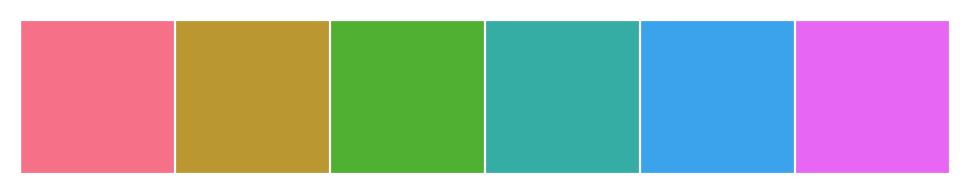

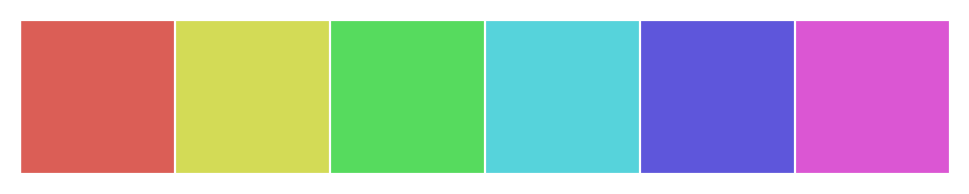

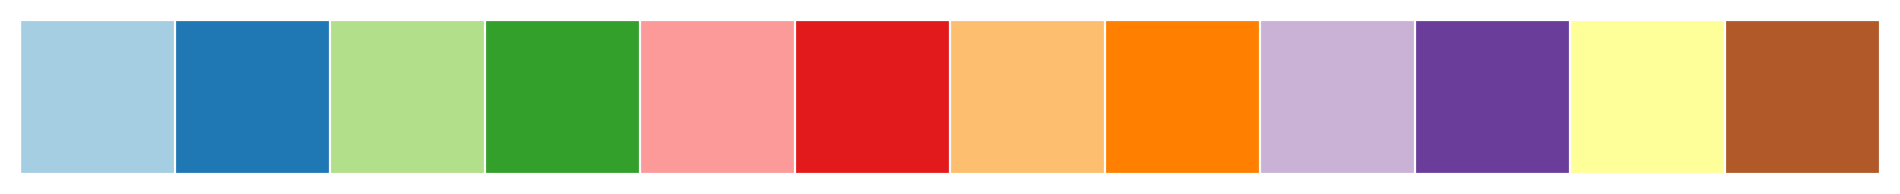

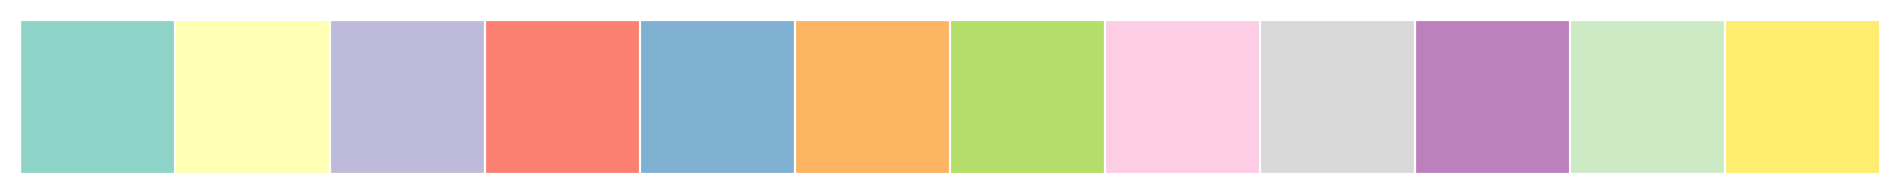

In [23]:
palettes = ['husl', 'hls', 'Paired', 'Set3']


for p in palettes:
  print(p)
  sns.set_palette(p)
  sns.palplot(sns.color_palette())


### Custom Palette
You can create own custom palettes by passing in a list of colour names or a list of hex colour codes.

In [24]:
custom_palette = ['#FBB4AE', '#B3CDE3', '#CCEBC5',
                  '#DECBE4', '#FED9A6', '#FFFFCC']

Lets apply our custom palette to a chart.


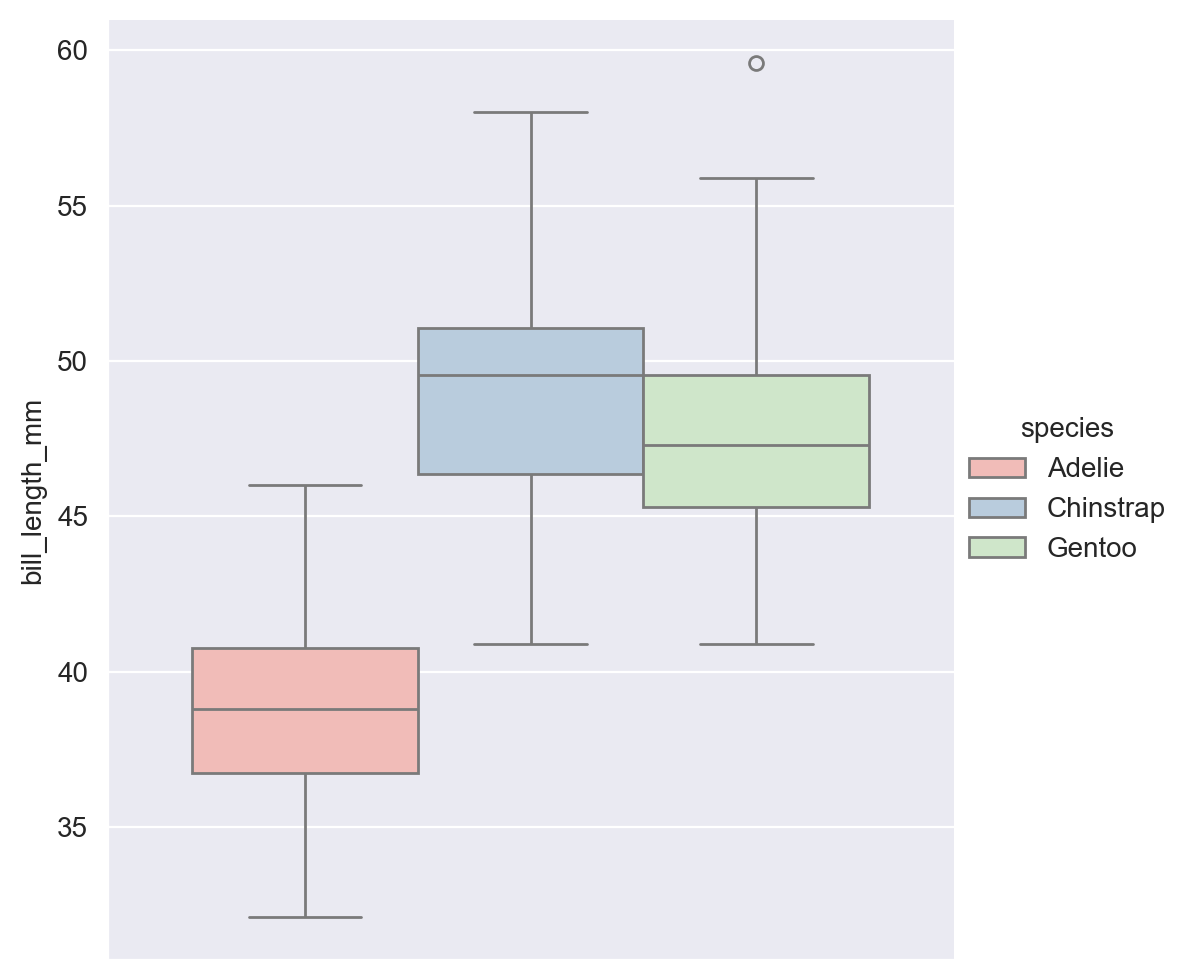

In [25]:
sns.set_palette(custom_palette)
#if you want other palettes just insert the palette name inside the bracket.

sns.catplot(data= penguins_data,
            y= 'bill_length_mm',
            kind= 'box',
            hue = 'species')

## FacetGrid vs AxesSubplot
Reminder, there are two types of Seaborn plot types:
- Figure- level: FacetGrid
- Axes- level: AxesSubplot

The customization of labels and axes are different for the two types of plot.

If you're unsure, which is which, there is a function "type" that will tell you.

matplotlib.axes._axes.Axes

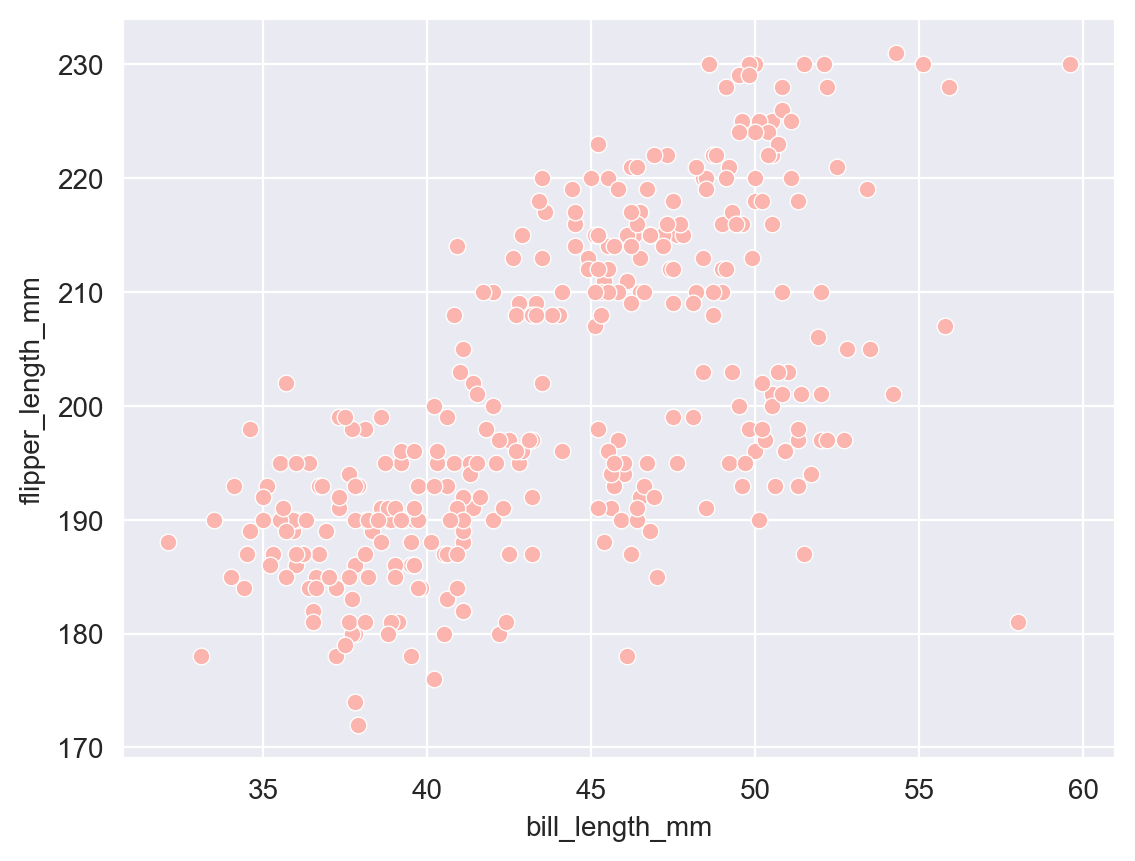

In [26]:
# Here is an example to figure out the plot type:
g = sns.scatterplot(data= penguins_data,
                    x= 'bill_length_mm',
                    y= 'flipper_length_mm')

type(g)

The output ("matplotlib.axes._axes.Axes) tell us this scatterplot is a AxesSubplot object.

### Adding a Title to FacetGrid

Text(0.5, 1.03, 'Penguin Bill Length Box Plot')

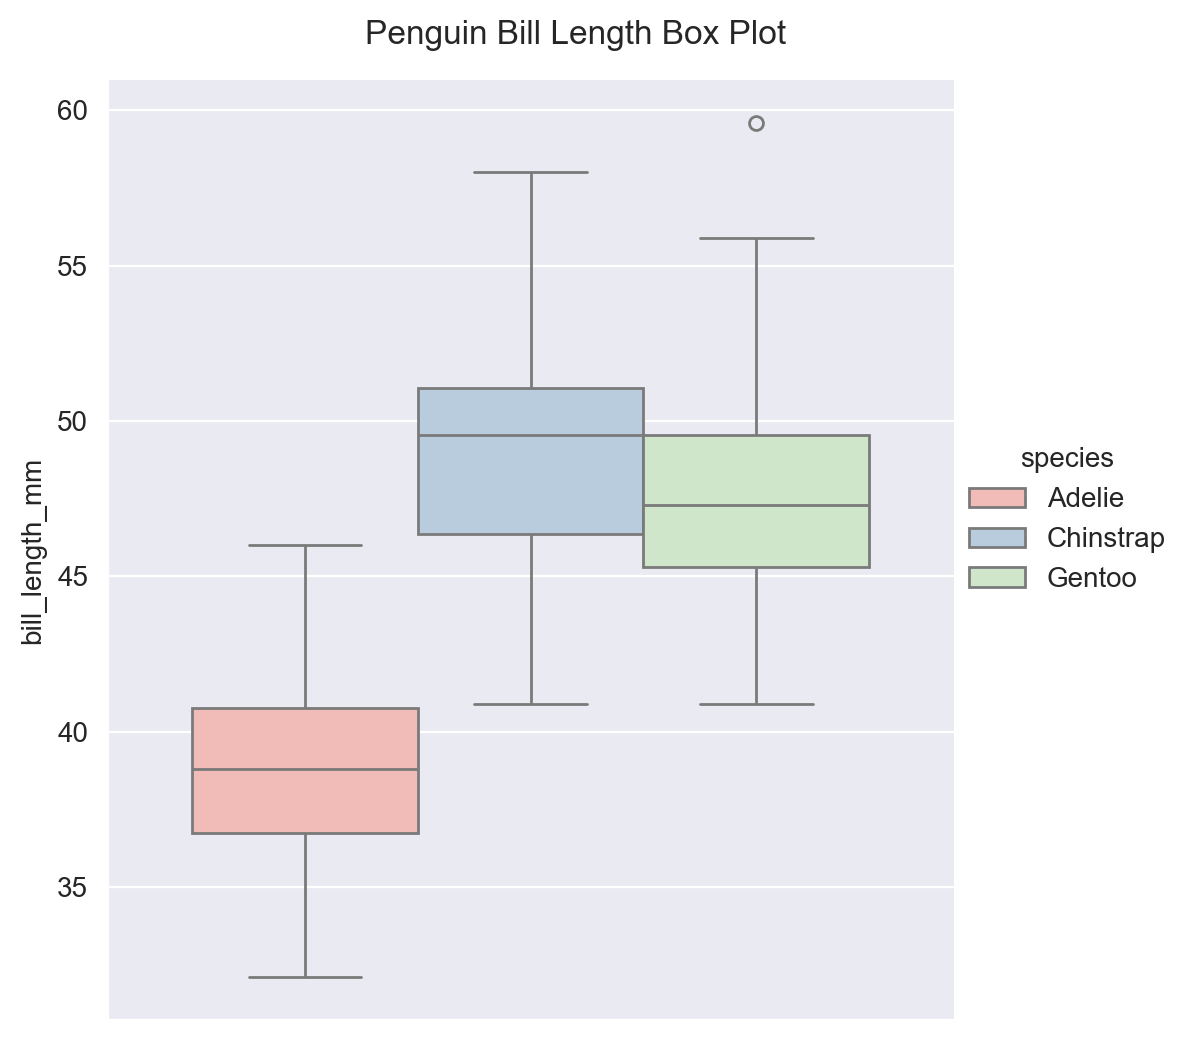

In [27]:
g = sns.catplot(data= penguins_data,
                y= 'bill_length_mm',
                kind= 'box',
                hue = 'species')

# Add title. y parameter adjust the height of the title
g.figure.suptitle("Penguin Bill Length Box Plot", y= 1.03)

### Adding a Title to AxesSubplot


Text(0.5, 1.03, 'Penguin Bill Length Box Plot')

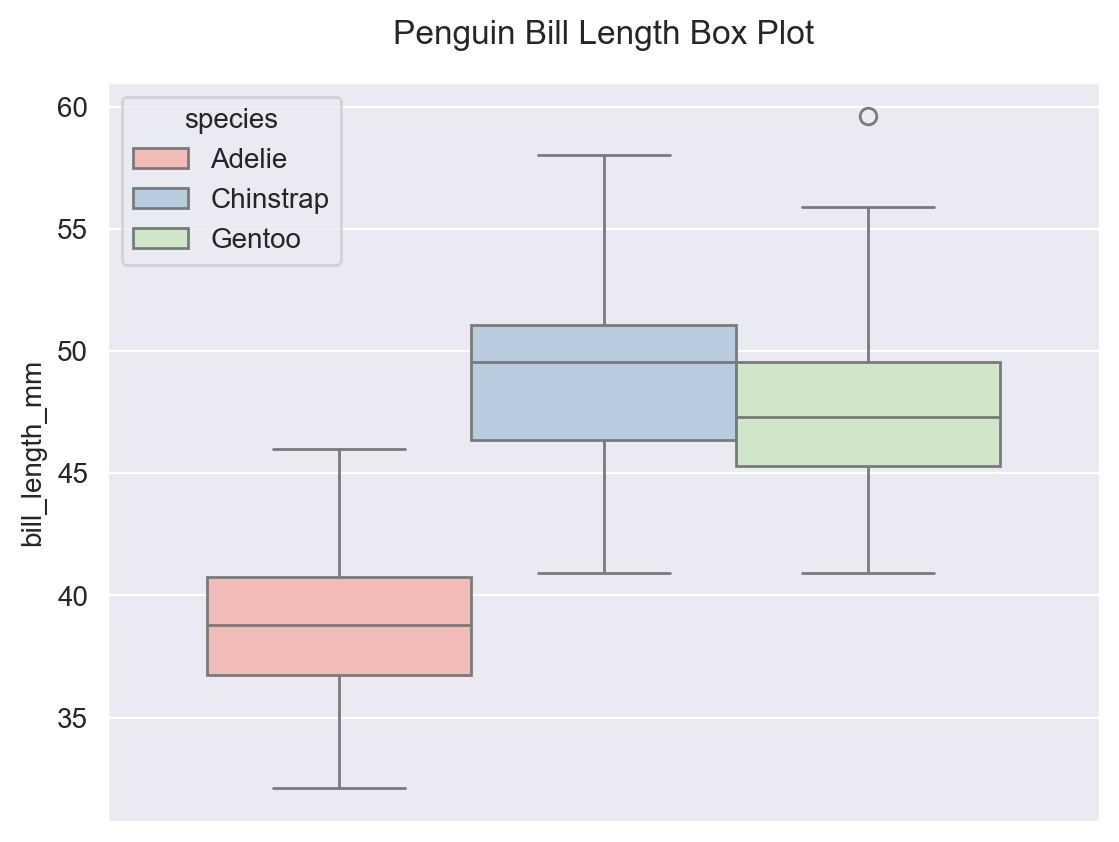

In [28]:
g = sns.boxplot(data= penguins_data,
                y= 'bill_length_mm',
                hue = 'species')

g.set_title("Penguin Bill Length Box Plot", y= 1.03)

# Adding Title for FacetGrid Subplots


Text(0.5, 1.03, 'Penguin Bill Length Box Plot')

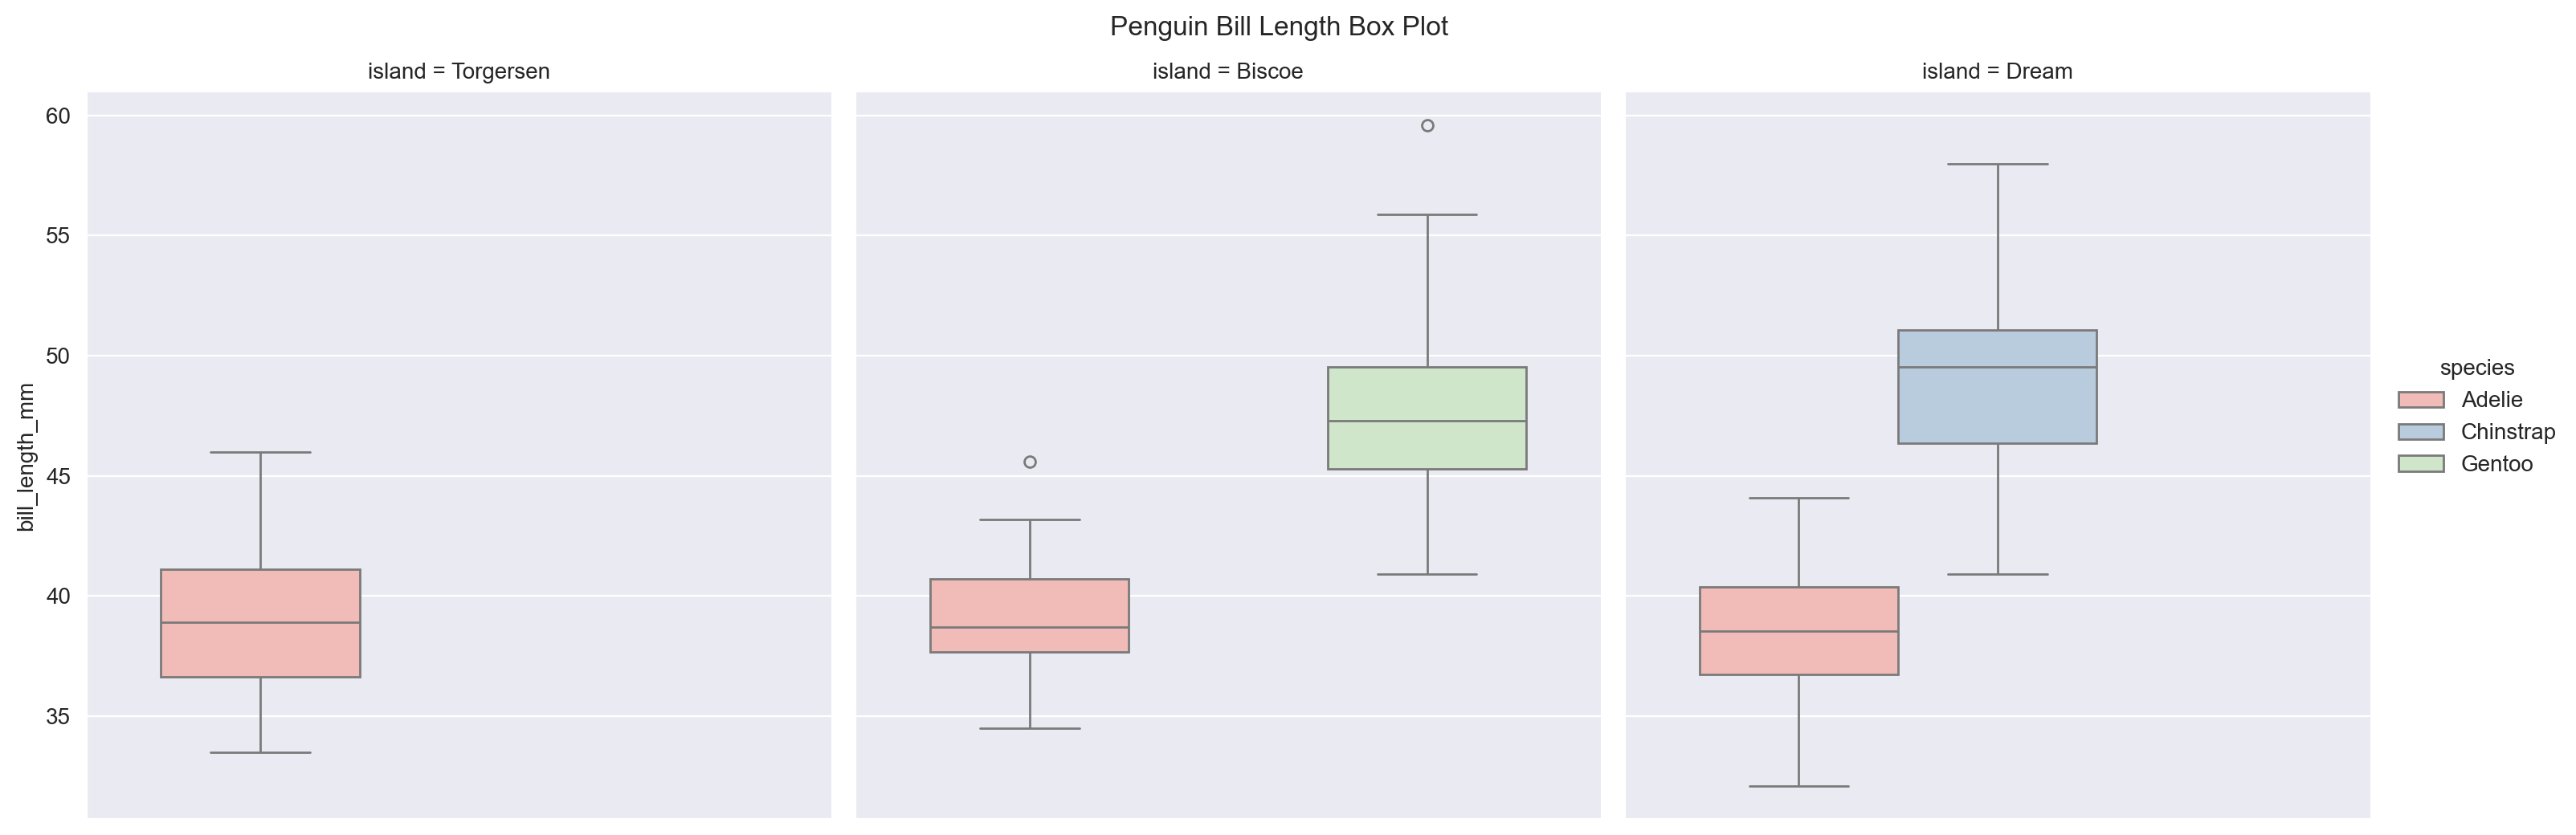

In [29]:
g = sns.catplot(data= penguins_data,
                y= 'bill_length_mm',
                kind= 'box',
                hue = 'species',
                col= 'island')
# "col" parameter creates three subplots.

g.figure.suptitle("Penguin Bill Length Box Plot", y= 1.03)
# Add title. y parameter adjust the height of the title

Text(0.5, 1.03, 'Penguin Bill Length Box Plot')

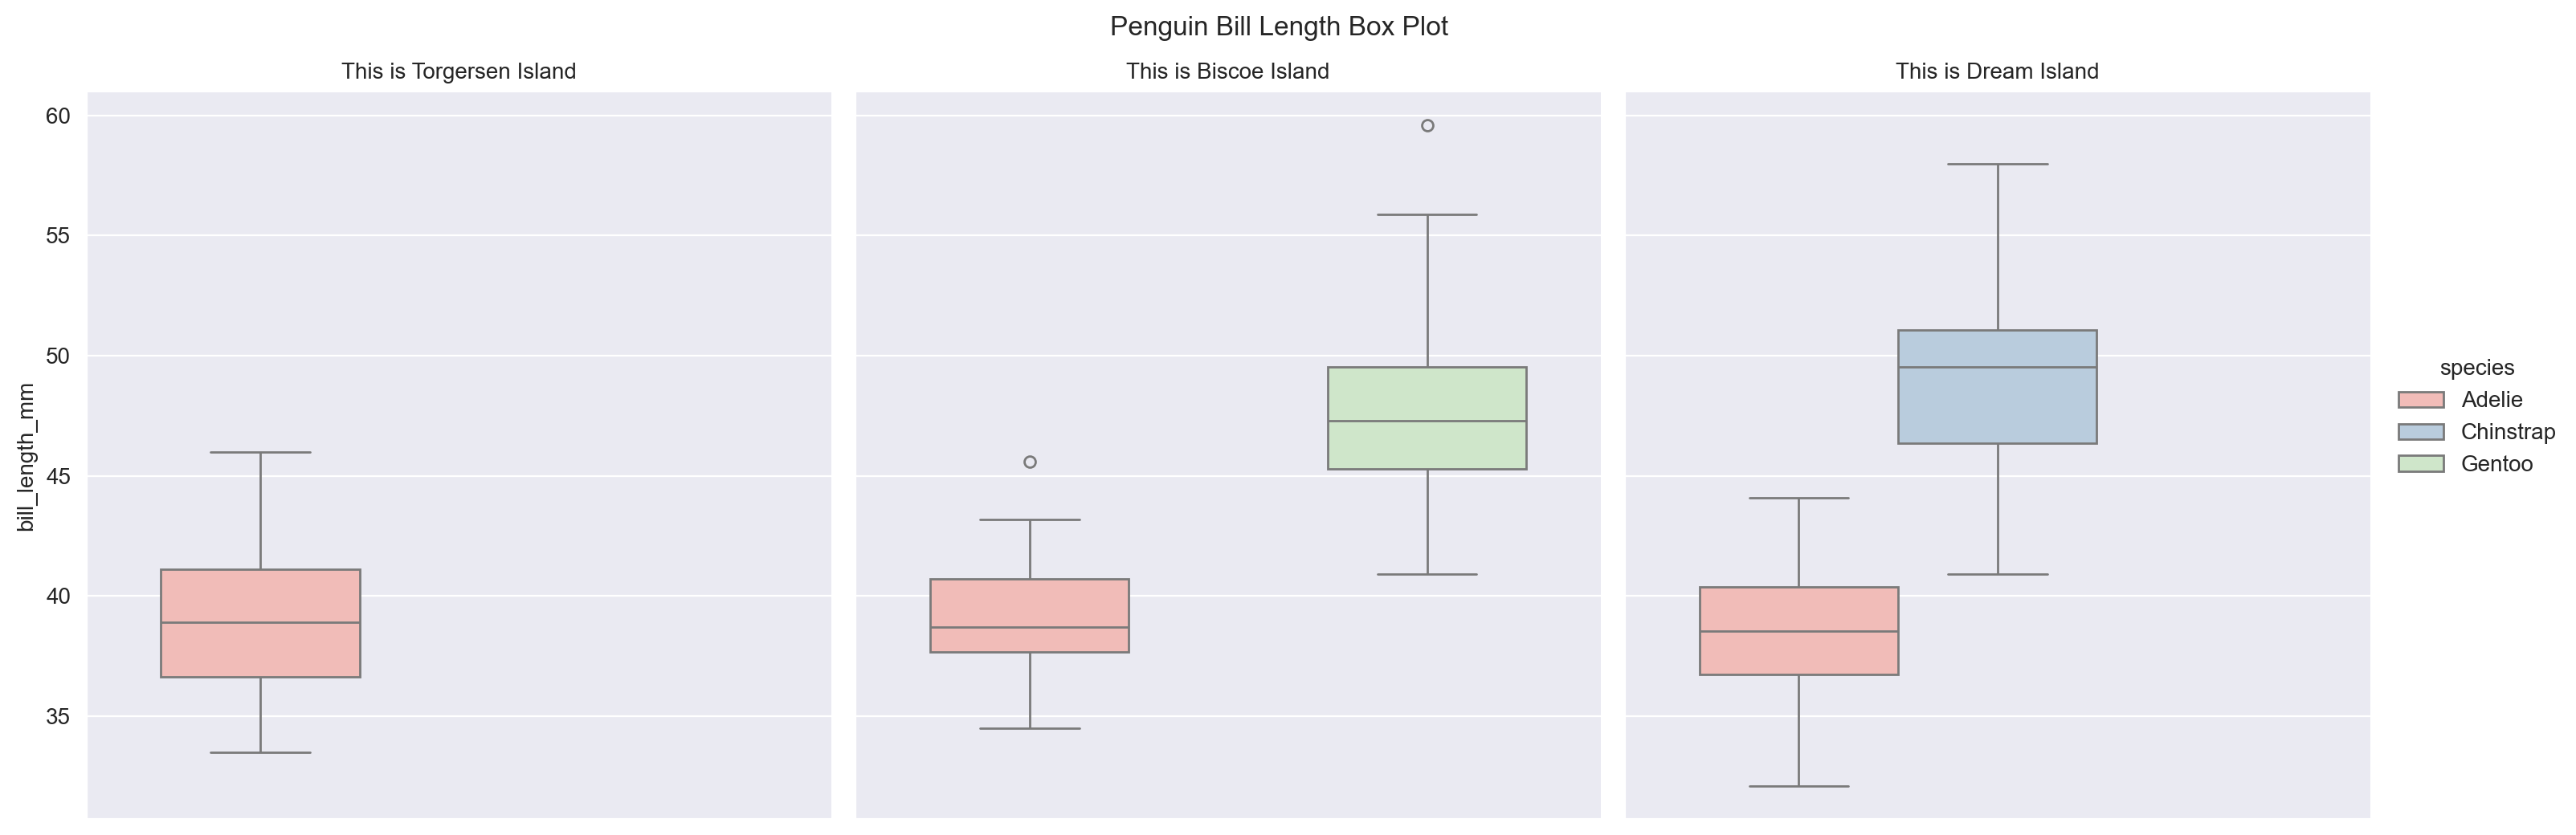

In [30]:
# notice with the subplots we have subtitles. We can alter the subtitles.

g = sns.catplot(data= penguins_data,
                y= 'bill_length_mm',
                kind= 'box',
                hue = 'species',
                col= 'island')

g.figure.suptitle("Penguin Bill Length Box Plot", y= 1.03)

g.set_titles("This is {col_name} Island")
# setting subtitles. {col_name} is the variable.

### Adding axis labels
Same method for FacetGrid and AxesSubpot plot types.

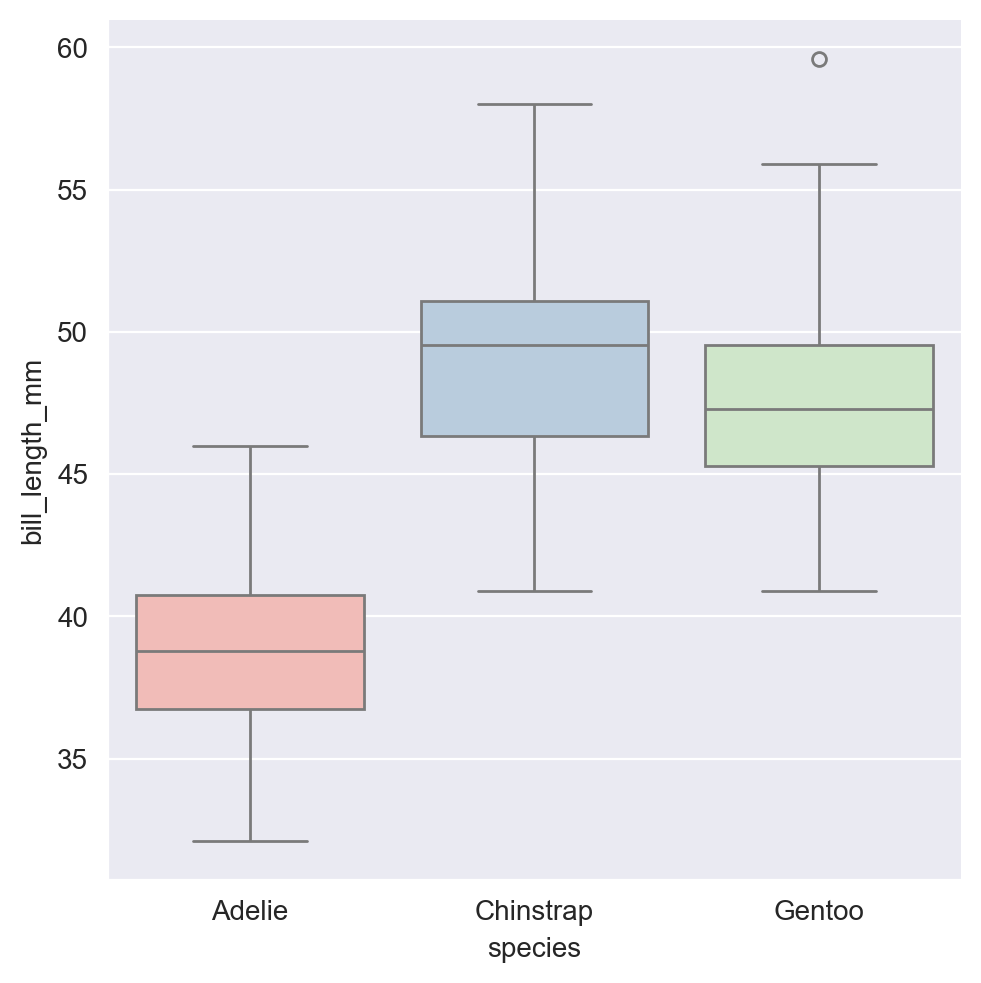

In [31]:
g = sns.catplot(data= penguins_data,
                x= 'species',
                y= 'bill_length_mm',
                kind= 'box',
                hue = 'species')

g.set(xlabel = 'species',
      ylabel= "bill_length_mm")

### Rotating x-axis/ y-axis tick labels
Sometime tick labels may overlap, making it hard to read. You could address by rotating the tick labels.
To do this, we don't call a function on the plot itself. Instead, after the plot is created, we call the matplotlib function 'plt.xticks'or 'plt.yticks' and set rotation.
This works with both FacetGrid and AxesSubplot

([0, 1, 2],
 [Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')])

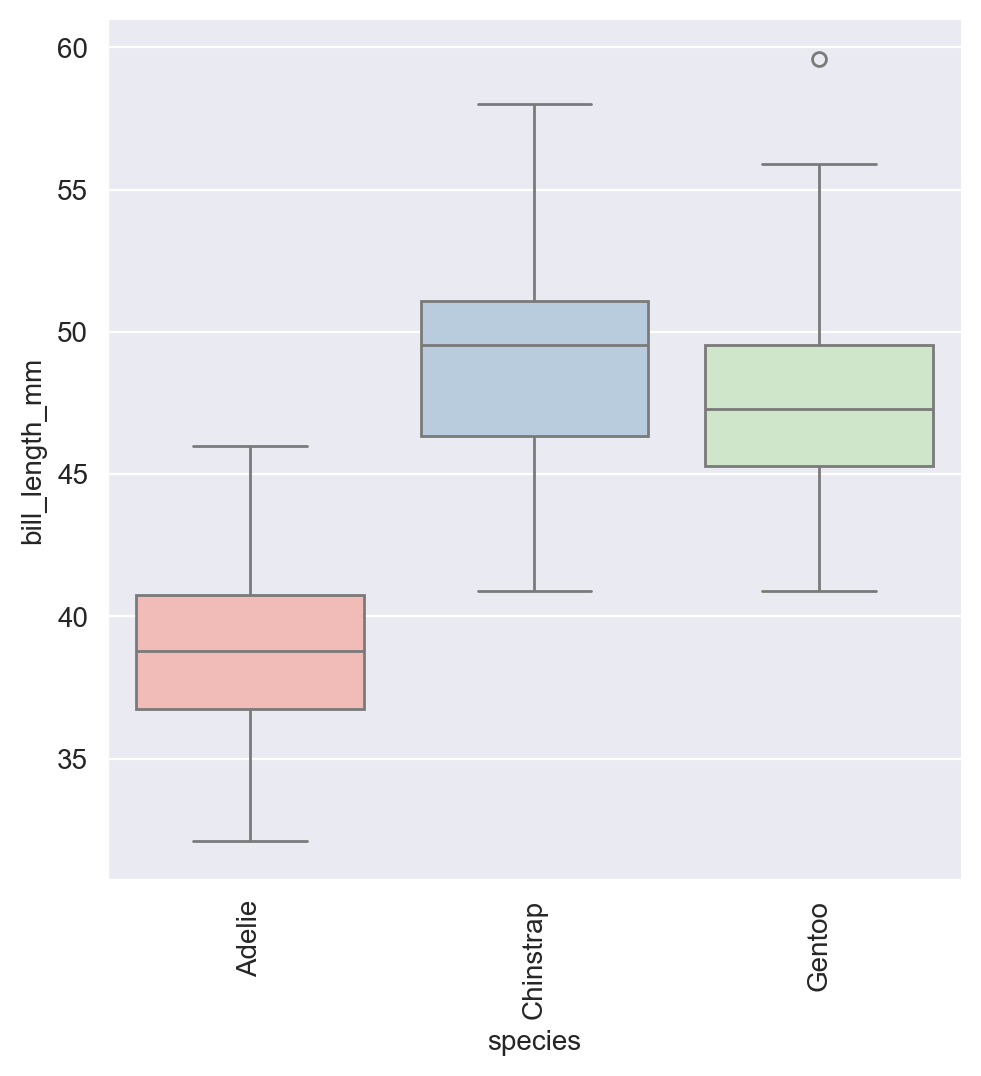

In [32]:
g = sns.catplot(data= penguins_data,
                x= 'species',
                y= 'bill_length_mm',
                kind= 'box',
                hue = 'species')

g.set(xlabel = 'species',
      ylabel= "bill_length_mm")

plt.xticks(rotation = 90)